## Data Exploration

In [1]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import pickle as pkl
import cv2

In [2]:
# printing directory
os.getcwd()

'C:\\Users\\abelp\\machine_learning\\crowd_count'

In [3]:
# laoding cwd
cwd = os.getcwd()

In [4]:
# list directory
os.listdir(cwd+ '\\color_data')

['count_.csv', 'frames']

In [5]:
# load the target variables for the NN
target = pd.read_csv(cwd + '\\color_data\\count_.csv', names=['target'])

In [6]:
# view target
target

,target
0,29
1,30
2,35
3,31
4,26
...,...
1995,27
1996,27
1997,25
1998,26


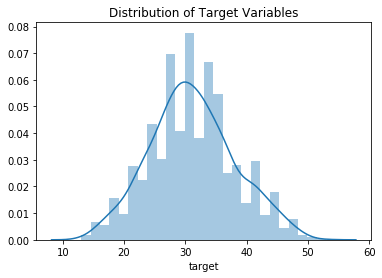

In [7]:
# distribution plot of target variables
sns.distplot(target['target'])
plt.title('Distribution of Target Variables')
plt.savefig('target_distribution.png', transparent=True)
plt.show()

In [8]:
print ('Mean of target variable: {}'.format(target.target.mean()))

Mean of target variable: 31.1575


## Inspecting Frames

#### Printing out the frames to determine if the target variable lines up with each image

In [9]:
frames = os.listdir(cwd + '\\color_data\\frames\\')

In [10]:
frames[-1]

'seq_002000.jpg'

In [11]:
input_ = []

In [12]:
for x in frames:
    input_.append(plt.imread(cwd + '\\color_data\\frames\\' + x))

In [13]:
input_ = np.array(input_)

target    29
Name: 0, dtype: int64


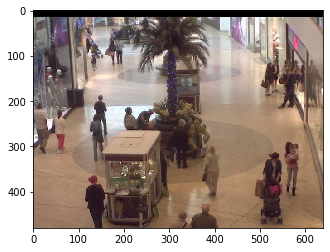

In [14]:
print (target.iloc[0])
plt.imshow(input_[0])
plt.show()

target    26
Name: 500, dtype: int64


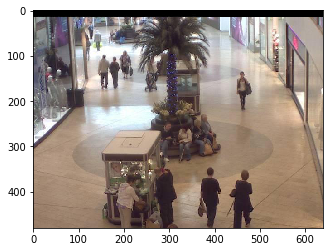

In [15]:
print (target.iloc[500])
plt.imshow(input_[500])
plt.show()

target    38
Name: 1000, dtype: int64


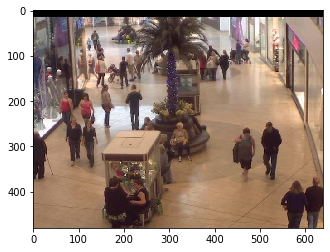

In [16]:
print (target.iloc[1000])
plt.imshow(input_[1000])
plt.show()

#### The target variable is approximately correct for each frame. There are no data validation issues.

## Benchmarking - MSE

<b>Benchmarking to the mean of the target variable will give a baseline for which we can evaluate the CNN models</b>

<b>The performance of the model will based on the MSE from the target mean.</b>

In [17]:
predictions = target.mean()

In [18]:
mse_benchmark = np.mean(((np.repeat(predictions,len(target)).values-np.array(target))**2))

In [19]:
print ('Benchmark MSE: {}'.format(mse_benchmark))

Benchmark MSE: 48.21469374999995
